In [1]:
import os   # import os module
import numpy as np # import numpy module
from keras.models import Sequential # import Sequential module from keras module    
from keras.layers import Activation, Dropout, Flatten, Dense # import Activation, Dropout, Flatten, Dense modules from keras module
from keras.preprocessing.image import ImageDataGenerator    # import ImageDataGenerator module from keras module
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D # import Conv2D, MaxPooling2D, ZeroPadding2D modules from keras module
from keras import optimizers # import optimizers module from keras module
import scipy # import scipy module for image processing and analysis  
import pylab as pl # import pylab module for plotting  
import matplotlib.cm as cm # import matplotlib.cm module for color mapping
%matplotlib inline    

input_shape = (150, 150, 3) # input shape for the model 
img_width, img_height = 150, 150 # input image dimensions for the model 

nb_train_samples = 2000 # number of training samples 
nb_validation_samples = 1000 # number of validation samples
batch_size = 16 # batch size for training 
epochs = 25 # number of epochs for training 




In [7]:
train_data_dir = r'E:\Porject\image_classification\training_set\training_set' # path to training data directory
validation_data_dir = r'E:\Porject\image_classification\test_set\test_set' # path to validation data directory

In [8]:
# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,              # normalize pixel values to [0,1]
    rotation_range = 30,           # randomly applies rotations
    width_shift_range = 0.3,       # randomly applies width shifting
    height_shift_range = 0.3,      # randomly applies height shifting
    horizontal_flip = True,        # randonly flips the image
    fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

In [9]:
# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [10]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8000 // batch_size,
    epochs = epochs, #number or epochs.
    validation_data = validation_generator,
    validation_steps = 2000 // batch_size)

C:\Users\dilip\AppData\Local\Temp\ipykernel_20792\429289494.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
500/500 [==============================] - 214s 427ms/step - loss: 0.6917 - accuracy: 0.5545 - val_loss: 0.6439 - val_accuracy: 0.6360
Epoch 2/25
500/500 [==============================] - 161s 322ms/step - loss: 0.6636 - accuracy: 0.6148 - val_loss: 0.6033 - val_accuracy: 0.6845
Epoch 3/25
500/500 [==============================] - 147s 294ms/step - loss: 0.6443 - accuracy: 0.6390 - val_loss: 0.6084 - val_accuracy: 0.6585
Epoch 4/25
500/500 [==============================] - 162s 324ms/step - loss: 0.6349 - accuracy: 0.6541 - val_loss: 0.7072 - val_accuracy: 0.5990
Epoch 5/25
500/500 [==============================] - 153s 306ms/step - loss: 0.6238 - accuracy: 0.6654 - val_loss: 0.6349 - val_accuracy: 0.6435
Epoch 6/25
500/500 [==============================] - 149s 297ms/step - loss: 0.6190 - accuracy: 0.6719 - val_loss: 0.5489 - val_accuracy: 0.7300
Epoch 7/25
500/500 [==============================] - 171s 342ms/step - loss: 0.6091 - accuracy: 0.6834 - val_loss: 0.5232 -

In [12]:
history.history

{'loss': [0.6916530728340149,
  0.6635685563087463,
  0.6442593932151794,
  0.6348909735679626,
  0.6238465905189514,
  0.6189687252044678,
  0.6091340780258179,
  0.6176350116729736,
  0.6099011898040771,
  0.6054571866989136,
  0.5984508395195007,
  0.6002660989761353,
  0.5980784296989441,
  0.5978483557701111,
  0.5922554731369019,
  0.6036179661750793,
  0.5941580533981323,
  0.5931389331817627,
  0.5954246520996094,
  0.6019499897956848,
  0.6024828553199768,
  0.6019715666770935,
  0.5968835949897766,
  0.5987491011619568,
  0.5846322774887085],
 'accuracy': [0.5545124411582947,
  0.6148453950881958,
  0.6390036344528198,
  0.6541494727134705,
  0.6654149293899536,
  0.6719238758087158,
  0.6834397315979004,
  0.6845662593841553,
  0.6878207325935364,
  0.689322829246521,
  0.6952059268951416,
  0.6940793395042419,
  0.6919514536857605,
  0.6974589824676514,
  0.7012141942977905,
  0.7048441767692566,
  0.6999624371528625,
  0.702966570854187,
  0.703342080116272,
  0.6967079639

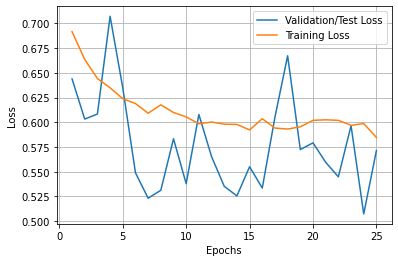

In [13]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
# plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
# plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

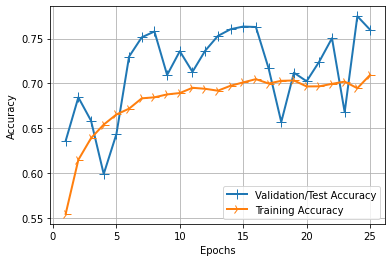

In [14]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\dilip\AppData\Local\Temp\ipykernel_20792\1131787608.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)


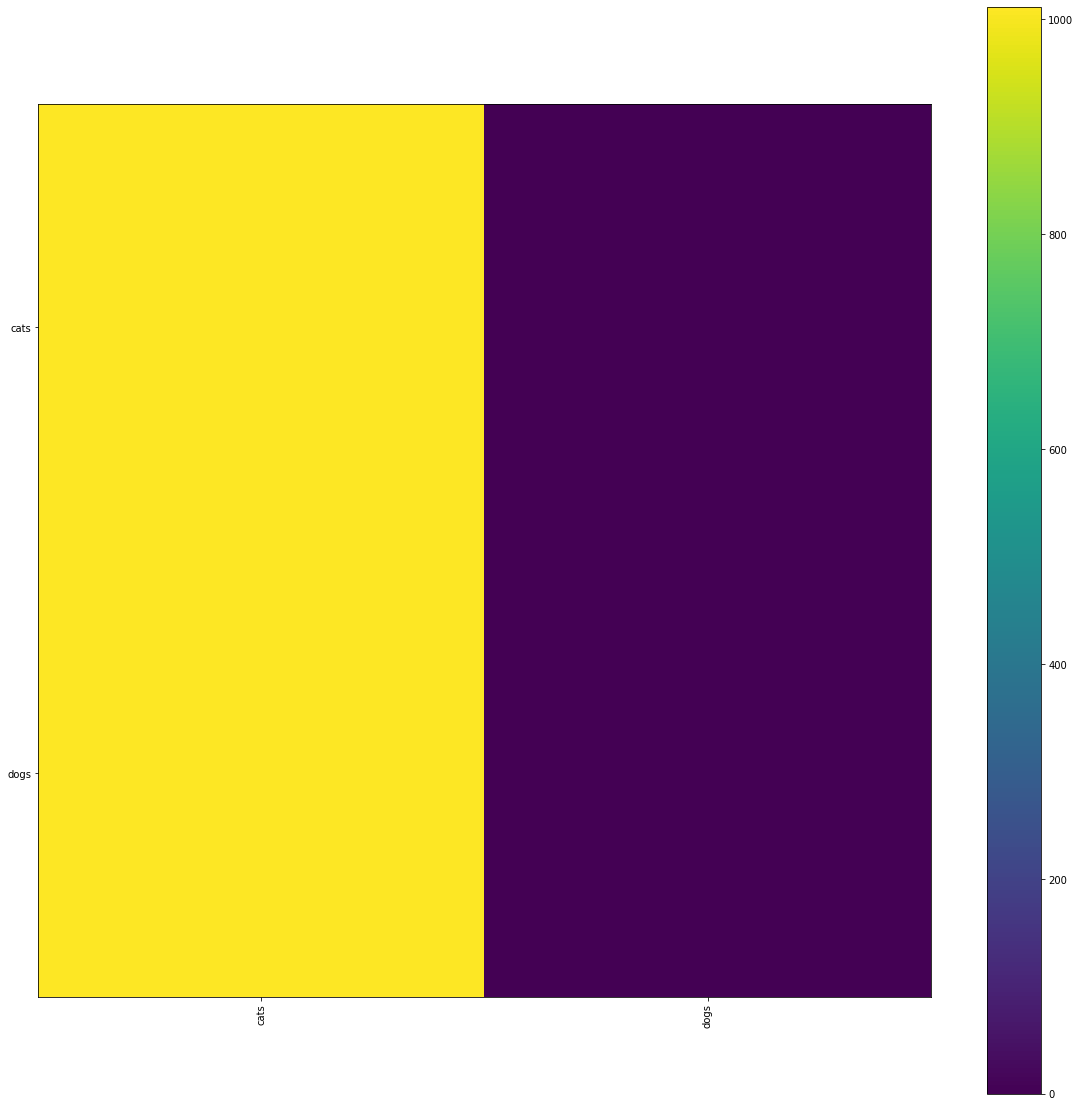

In [16]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 8005
nb_validation_samples = 2023

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [30]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img

test_image = load_img(r'E:\Porject\image_classification\training_set\training_set\cats\cat.10.jpg',target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
if result[0][0] == 1:
    print("This is dog")
else:
    print("this is cat")

AttributeError: module 'keras.preprocessing.image' has no attribute 'img_to_array'